<a href="https://colab.research.google.com/github/Satty-hub/Eniac-project/blob/main/Eniac_product_category_calculation_for_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

First we want to know the data

1.   Total products selled
2.   Average price
3.   Maximum selled products by brands
4.   Total revenue and distribution
5.   Seasonal pattern







Let's start combining some of the skills we've learnt with .groupby(), datetime, and seaborn (no pandas plotting this time, please use seaborn).

Sometimes you may have to make a smaller DataFrame to help Seaborn. Here's a quick example of one way to plot the top 10 brands based on the amount of products sold.

In [ ]:
pr_df=products_cl.copy()

In [ ]:
ol_df = orderlines_qu.copy()

In [ ]:
ol_df["short"] = ol_df["sku"].str[:3]

In [ ]:
ol_with_brands_df = ol_df.merge(brands,
                                how="left",
                                left_on="short",
                                right_on="short")
ol_with_brands_df.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,OWC,OWC
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,IOT,iOttie


In [ ]:
pr_df

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


In [ ]:
ol_brand =ol_with_brands_df.copy()

Find the 10 most selled product by brands

In [ ]:
brands_10_most_sold_df = (
                         ol_with_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
5,Apple,11156
99,OWC,3857
161,Western Digital,2404
9,Belkin,2279
67,LaCie,2130
19,Crucial,2070
128,Satechi,1824
160,Wacom,1816
106,Pack,1710
91,NewerTech,1648


<ipython-input-44-3f3904799817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind="bar",


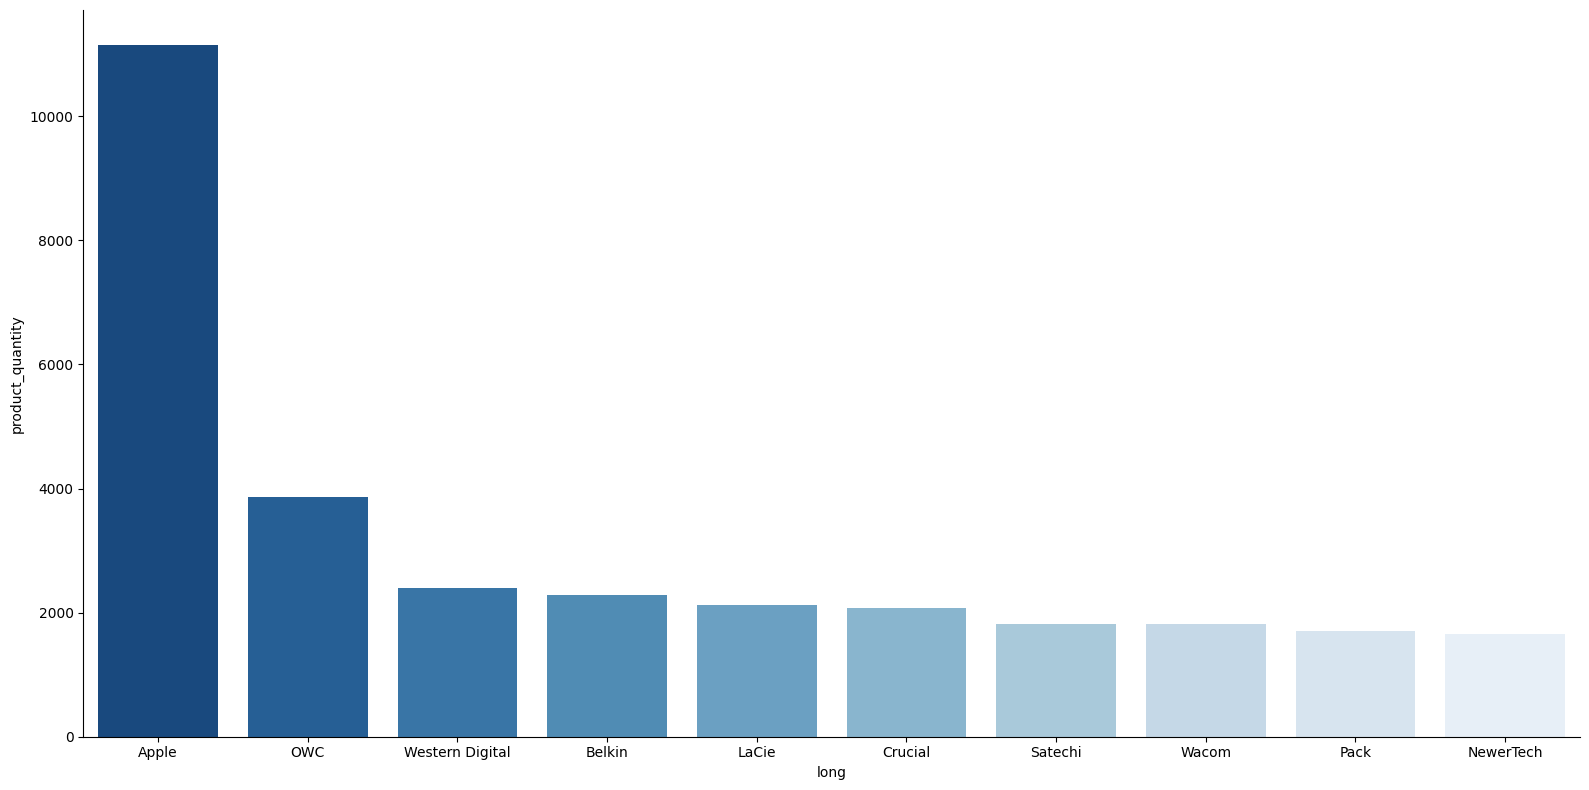

In [ ]:
import seaborn as sns
sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="long",
            y="product_quantity",
            height=8,
            aspect=2,
            palette="Blues_r");

Challenge 2:
Create a scatter plot to explore the relationship between the recommended price for a product (products.price) and the price that products actually sold for (orderlines.unit_price)

Hint: You don't need to groupby here. Just bring a couple of tables together and then use seaborn.

In [ ]:
# Make the copy of the product and orders DataFrame
pr_df=products_cl.copy()
or_df=orders_qu.copy()

# We start with merging orderlines DataFrame together with Product on sku

In [ ]:
ol_pr=pd.merge(
    ol_df,
    pr_df,
    how="left",
    on="sku")

In [ ]:
ol_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53231 entries, 0 to 53230
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                53231 non-null  int64  
 1   id_order          53231 non-null  int64  
 2   product_id        53231 non-null  int64  
 3   product_quantity  53231 non-null  int64  
 4   sku               53231 non-null  object 
 5   unit_price        53231 non-null  float64
 6   date              53231 non-null  object 
 7   short             53231 non-null  object 
 8   name              53231 non-null  object 
 9   desc              53231 non-null  object 
 10  price             53231 non-null  float64
 11  in_stock          53231 non-null  int64  
 12  type              53220 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 5.3+ MB


In [ ]:
# Calculate the price
ol_pr['disc']=ol_pr['price']-ol_pr['unit_price']

In [ ]:
# Calculate the percentage
ol_pr['disc_perc']=round(ol_pr['disc']*100/ol_pr['price'],2)

In [ ]:
import matplotlib.pyplot as plt

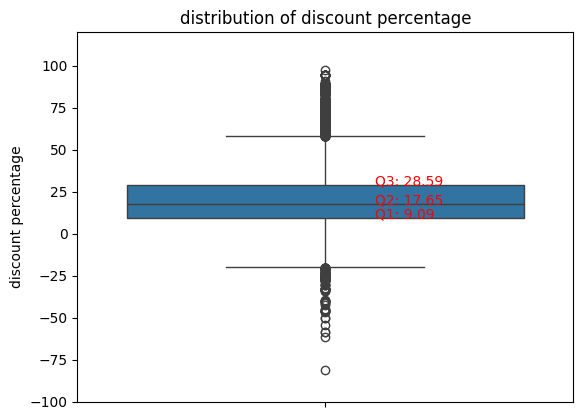

In [ ]:
sns.boxplot(data=ol_pr, y='disc_perc')

quartiles = ol_pr['disc_perc'].quantile([0.25, 0.5, 0.75])

for i, quartile in enumerate(quartiles):
    plt.text(x=0.1,
             y=quartile,
             s=f"Q{i+1}: {quartile:.2f}",
             fontdict={"size": 10, "color": "red"})

plt.title('distribution of discount percentage')
plt.ylabel('discount percentage')
plt.ylim(-100, 120)
plt.show()

Calculate the discount percentage in quartile and see how the pattern looks like

In [ ]:
ol_pr['disc_perc'].quantile([.25,.5,.75,.9])

,disc_perc
0.25,9.09
0.50,17.65
0.75,28.59
0.90,48.43


Now we can convert Long into the brands name and we saw most selling brands is apple in this data so we will focus on that.
We want to see top 10 most selling apple product with and without discount.


In [ ]:
ol_pr_df=ol_pr.groupby('date',as_index=False).agg({'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'})

In [ ]:
iqr=ol_pr['disc_perc'].quantile(.75)-ol_pr['disc_perc'].quantile(.25)
most=ol_pr['disc_perc'].quantile(.75)+1.5*iqr
least=ol_pr['disc_perc'].quantile(.25)-1.5*iqr
(most,least)

(np.float64(57.84), np.float64(-20.16))

In [ ]:
ol_pr['date']=pd.to_datetime(ol_pr['date'])

In [ ]:
# To check the selling pattern by month
ol_pr['year_month']=ol_pr['date'].dt.strftime('%Y-%m')

In [ ]:
ol_pr_br=ol_pr.merge(brands,
                                how="left",
                                on="short",)

In [ ]:
ol_pr_brApple=ol_pr_br.loc[ol_pr_br['long']=='Apple',:]

In [ ]:
ol_pr_brApple

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,disc,disc_perc,year_month,long
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,APP,Apple 85W MagSafe 2 charger MacBook Pro screen...,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,89.0,1,13005399,16.81,18.89,2017-01,Apple
14,1119255,299610,0,1,APP0023,55.99,2017-01-01 10:52:42,APP,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.0,0,13855401,3.01,5.10,2017-01,Apple
15,1119257,299610,0,1,APP1214,84.99,2017-01-01 10:53:10,APP,Apple Magic Mouse 2,Bluetooth Apple Wireless Mouse,89.0,1,1387,4.01,4.51,2017-01,Apple
31,1119422,299681,0,1,APP0701,69.34,2017-01-01 13:09:14,APP,Apple 45W MagSafe 2 charger MacBook Air in Ju...,Apple charger MacBook Air MagSafe 2 45W withou...,89.0,1,13005399,19.66,22.09,2017-01,Apple
33,1119470,299704,0,1,APP0697,12.99,2017-01-01 13:41:17,APP,OEM USB Cable for iPhone iPad Dock and Apple i...,Cable OEM dock for iPhone iPad and iPod compat...,25.0,1,1230,12.01,48.04,2017-01,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,APP,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.0,1,1230,15.01,60.04,2018-03,Apple
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,APP,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.0,1,1230,15.01,60.04,2018-03,Apple
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,APP,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.0,1,1230,15.01,60.04,2018-03,Apple
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,APP,Apple Lightning Cable Connector to USB 1m Whit...,Apple Lightning USB Cable 1 meter to charge an...,25.0,1,1230,15.01,60.04,2018-03,Apple


In [ ]:
ol_pr_brApple_df=ol_pr_brApple.groupby('year_month',as_index=False).agg({'price':'mean','unit_price':'mean', 'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'})

In [ ]:
# To see the avg price after and before discount.
ol_pr_brApple_df.rename(columns={'price':'avg_price','unit_price':'avg_unit_price', 'product_quantity':'total_units_sold'}, inplace=True)

In [ ]:
ol_pr_brApple_df['expected_revenue']=ol_pr_brApple_df['avg_price']*ol_pr_brApple_df['total_units_sold']

In [ ]:
ol_pr_brApple_df['actual_revenue']=ol_pr_brApple_df['avg_unit_price']*ol_pr_brApple_df['total_units_sold']

In [ ]:
# Compare the expected and actual revenue to see dicount is good or not overtime
ol_pr_brApple_df

,year_month,avg_price,avg_unit_price,disc_perc,disc,total_units_sold,expected_revenue,actual_revenue
0,2017-01,122.605713,112.703081,26.425702,9031.20,1069,131065.506897,120479.593739
1,2017-02,170.332730,164.076159,17.352349,1970.82,369,62852.777429,60544.102571
2,2017-03,121.043478,118.990870,17.779565,47.21,24,2905.043478,2855.780870
3,2017-04,190.321102,176.950906,13.216339,3396.03,269,51196.376535,47599.793583
4,2017-05,235.822358,220.041821,11.204955,5286.48,401,94564.765642,88236.770179
5,2017-06,282.450957,264.894851,12.751287,5319.50,338,95468.423498,89534.459802
6,2017-07,295.742135,258.557407,18.746589,38151.53,1119,330935.448509,289325.738889
7,2017-08,265.352004,215.605496,19.216412,26067.17,585,155230.922233,126129.215267
8,2017-09,315.934592,284.658501,14.747268,16482.50,559,176607.436945,159124.102030
9,2017-10,275.903511,255.767295,14.128835,13994.67,749,206651.729583,191569.703928


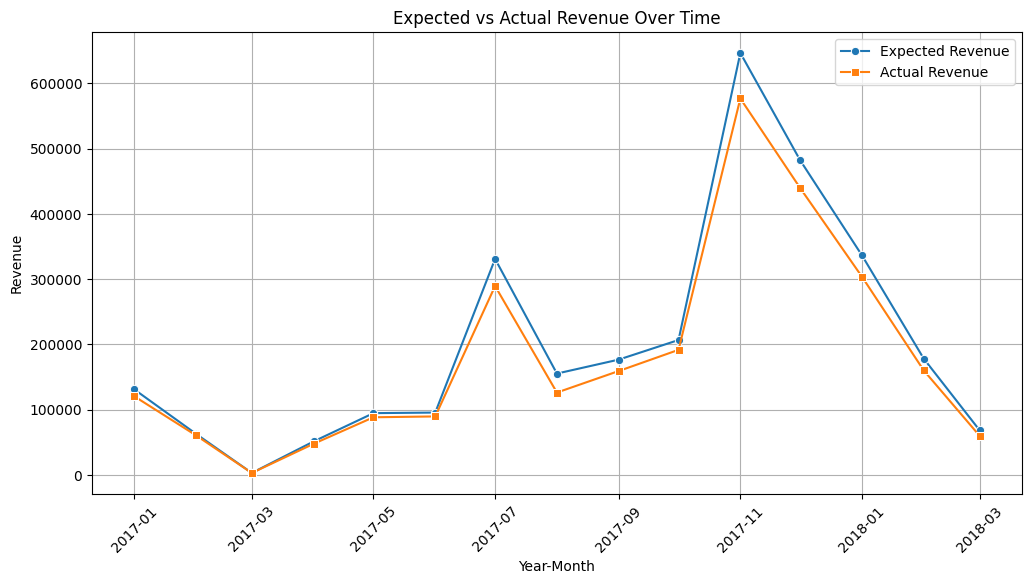

In [ ]:

# Convert 'year_month' to datetime
ol_pr_brApple_df['year_month'] = pd.to_datetime(ol_pr_brApple_df['year_month'])

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the data
sns.lineplot(data=ol_pr_brApple_df, x='year_month', y='expected_revenue', label='Expected Revenue', marker='o')
sns.lineplot(data=ol_pr_brApple_df, x='year_month', y='actual_revenue', label='Actual Revenue', marker='s')

plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.title('Expected vs Actual Revenue Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


We want to compare expected v/s actual revenue of the top 10 apple product

In [ ]:
ol_pr_brApplesku_df=ol_pr_brApple.groupby('name',as_index=False).agg({'price':'mean','unit_price':'mean', 'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'}).sort_values('product_quantity',ascending=False)

In [ ]:
ol_pr_brApplesku_df['actual_revenue']=ol_pr_brApplesku_df['unit_price']*ol_pr_brApplesku_df['product_quantity']
ol_pr_brApplesku_df['expected_revenue']=ol_pr_brApplesku_df['price']*ol_pr_brApplesku_df['product_quantity']

In [ ]:
ol_pr_brAppleskuTOP_df=ol_pr_brApplesku_df.nlargest(10,'actual_revenue')

In [ ]:
ol_pr_brAppleskuTOP_df

,name,price,unit_price,disc_perc,disc,product_quantity,actual_revenue,expected_revenue
290,Apple iPhone 6 32GB Space Gray,449.33,387.286500,13.809346,16131.31,270,104567.355000,121319.10
15,AirPods Apple Bluetooth Headset for iPhone iPa...,179.00,161.114012,9.994207,9139.74,537,86518.224305,96123.00
295,Apple iPhone 64GB Space Gray 8,809.00,789.956765,2.354412,1942.41,108,85315.330588,87372.00
289,Apple iPhone 32GB Space Gray,419.00,362.026864,13.597773,12534.09,223,80731.990591,93437.00
77,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",1105.59,973.887763,11.909605,10009.37,77,74989.357763,85130.43
335,Apple iPhone 8 Plus 64GB Gold,919.00,895.163974,2.593462,1859.21,79,70717.953974,72601.00
337,Apple iPhone 8 Plus 64GB Space Gray,919.00,895.954355,2.507258,1428.83,67,60028.941774,61573.00
291,Apple iPhone 64GB Gold 8,809.00,790.730152,2.258939,1205.81,67,52978.920152,54203.00
454,IPhone AppleCare Protection Plan,70.00,54.433622,22.236851,13496.05,955,51984.108708,66850.00
288,Apple iPhone 32GB Silver,419.00,364.537101,12.998986,7515.88,141,51399.731304,59079.00


<ipython-input-128-82e436d0ec42>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to prevent labels from being cut off


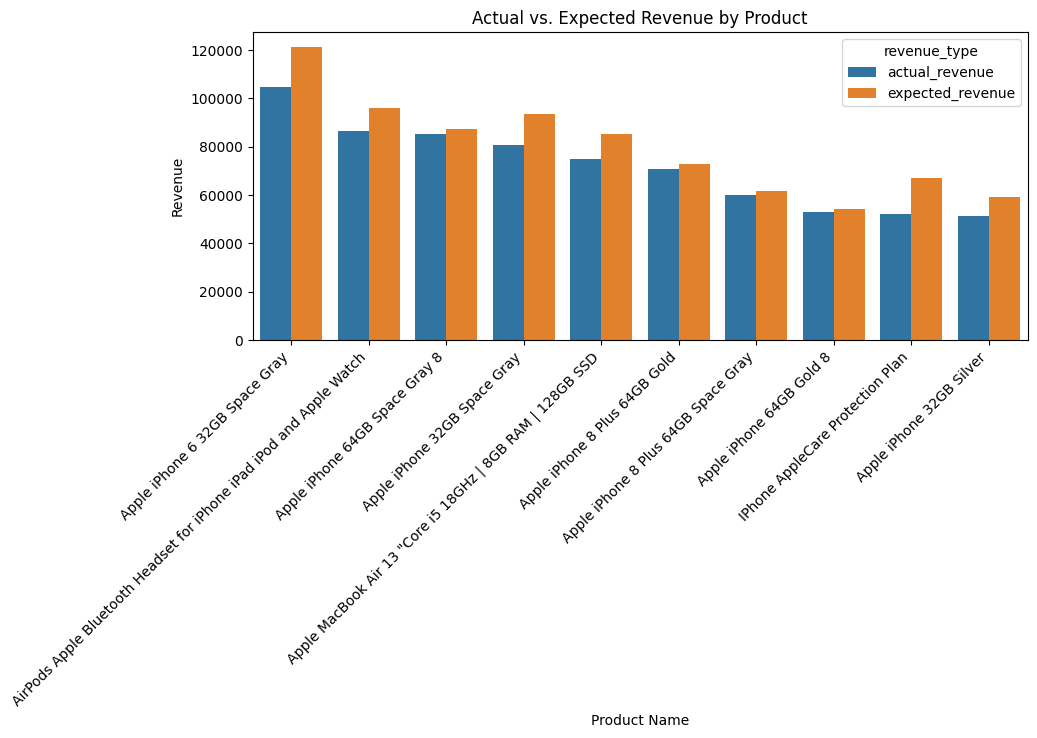

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

melted_df = pd.melt(ol_pr_brAppleskuTOP_df, id_vars=['name'], value_vars=['actual_revenue', 'expected_revenue'],
                    var_name='revenue_type', value_name='revenue')

# 2. Create the bar plot using Seaborn
plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
sns.barplot(x='name', y='revenue', hue='revenue_type', data=melted_df)

# 3. Customize the plot
plt.title('Actual vs. Expected Revenue by Product')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off

# 4. Show the plot
plt.show()

2. Realtionship between Product and dicsount percentage

Realtionship between product and discount

We want to see if discount help to sell more products.

In [ ]:
ol_pr_brApple_iphone_6=ol_pr_brApple.loc[ol_pr_brApple['name'].str.contains('iPhone 6 32GB Space Gray'),:]

In [ ]:
ol_pr_brApple_iphone_6_g=ol_pr_brApple_iphone_6.groupby('year_month',as_index=False).agg({'price':'mean','unit_price':'mean', 'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'})

In [ ]:
ol_pr_brApple_iphone_6_g

,year_month,price,unit_price,disc_perc,disc,product_quantity
0,2017-07,449.33,389.010000,13.427744,8022.56,138
1,2017-08,449.33,390.330000,13.130000,1770.00,30
2,2017-09,449.33,381.580000,15.077500,1084.00,17
3,2017-10,449.33,390.330000,13.130000,708.00,13
4,2017-11,449.33,338.077234,24.761489,5228.88,49
5,2017-12,449.33,364.303902,18.922927,3486.07,44
6,2018-01,449.33,370.417917,17.560833,1893.89,25
7,2018-02,449.33,363.572857,19.082857,1200.60,14
8,2018-03,449.33,371.602000,17.296000,388.64,5


Relationship between product quantity and discount

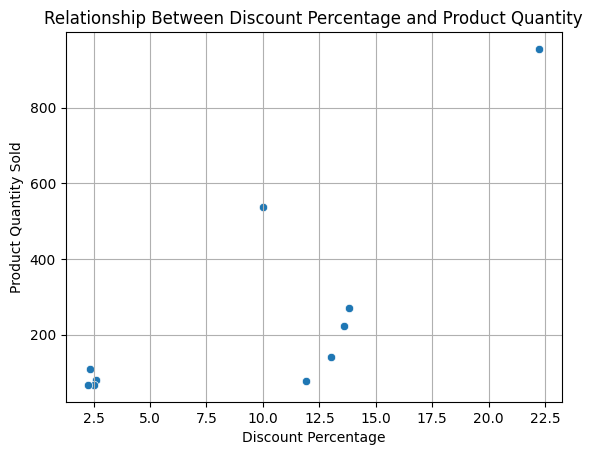

In [ ]:
sns.scatterplot(data=ol_pr_brAppleskuTOP_df, x='disc_perc', y='product_quantity')
plt.xlabel('Discount Percentage')
plt.ylabel('Product Quantity Sold')
plt.title('Relationship Between Discount Percentage and Product Quantity')
plt.grid(True)
plt.show()

We do not see any clear relationship between discount ans product quantity.

In [ ]:
# We merged the orderlines product brands.
ol_pr_brG=ol_pr_br.groupby('sku',as_index=False).agg({'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'})

In [ ]:
ol_pr_brG.sample(2)

,sku,disc_perc,disc,product_quantity
4978,WDT0369,15.916667,81.17,3
319,APP0400,1.776250,3.41,18


In [ ]:
# Next we check how many apple products is in this list

In [ ]:
ol_pr_brGA=ol_pr_brG.loc[ol_pr_brG['sku'].str.contains('APP'),:].sort_values('product_quantity',ascending=False)

In [ ]:
# grroup the maximum selled product and see the effect of discount percentage. Group the orderlines product apple group 1 with brands group.
ol_pr_brGA1=ol_pr_brGA.groupby

In [ ]:
ol_pr_brGA1

<bound method DataFrame.groupby of            sku  disc_perc      disc  product_quantity
448    APP1190  22.236851  13496.05               955
360    APP0698  60.037741   7174.51               820
655    APP1922   9.994207   9139.74               537
378    APP0927  50.978413   6744.57               489
765    APP2446  13.809346  16131.31               270
..         ...        ...       ...               ...
843    APP2540  10.340000      6.10                 1
842    APP2539  14.580000      8.60                 1
841    APP2538  14.830000      8.75                 1
342  APP0484-A  16.440000     17.92                 1
337  APP0477-A  18.580000     10.96                 1

[572 rows x 4 columns]>

<ipython-input-139-728df7ade8a7>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(kind='line',


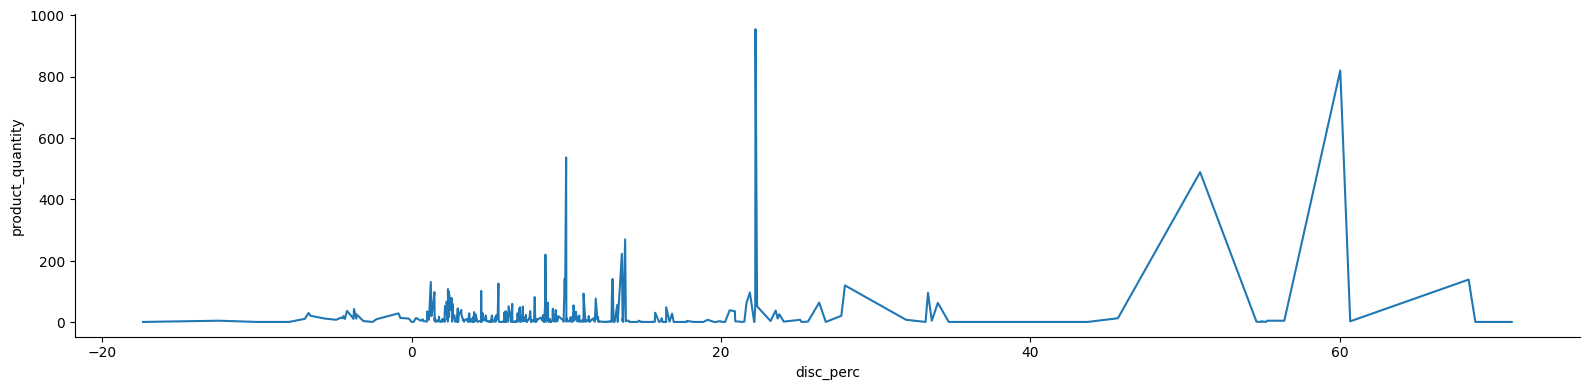

In [ ]:
sns.relplot(kind='line',
            data=ol_pr_brGA,
            x='disc_perc',
            y='product_quantity',
            height=4,
            aspect=4,
            palette='rocket')

Discount overtime

Discount overtime. We used most selled product with and without discount to see if discount make sense or not.

In [ ]:
ol_pr_ZAG0032=ol_pr.loc[ol_pr['sku']=='ZAG0032',:]

In [ ]:
ol_pr_JAW0048=ol_pr.loc[ol_pr['sku']=='JAW0048',:]

In [ ]:
ol_pr_JAW0048

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,name,desc,price,in_stock,type,disc,disc_perc,year_month
549,1123032,301335,0,1,JAW0048,49.99,2017-01-03 09:48:42,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,70.0,58.34,2017-01
788,1126821,302062,0,2,JAW0048,49.99,2017-01-03 22:03:30,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,70.0,58.34,2017-01
962,1130736,302913,0,1,JAW0048,29.99,2017-01-05 08:46:07,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-01
981,1130865,302985,0,1,JAW0048,29.99,2017-01-05 09:37:03,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-01
982,1130867,302987,0,1,JAW0048,29.99,2017-01-05 09:37:41,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,1232220,348205,0,1,JAW0048,29.99,2017-04-21 10:32:46,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-04
9930,1232485,348186,0,1,JAW0048,29.99,2017-04-21 12:41:09,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-04
9944,1232567,348375,0,1,JAW0048,29.99,2017-04-21 13:24:00,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-04
9956,1232637,348414,0,1,JAW0048,29.99,2017-04-21 14:37:01,JAW,Jawbone UP2 Black Rope Activity Monitor,Bluetooth activity monitor that records moveme...,119.99,0,11905404,90.0,75.01,2017-04


In [ ]:
#  Once we have the most selled product list then we looked the total product quantity selled over time.
#  we group the orderline product data with most sold product with year and month
ol_pr_ZAG0032 = ol_pr_ZAG0032.groupby(['year_month',], as_index=False).agg({'product_quantity':'sum','unit_price':'mean','disc_perc':'mean','disc':'sum'})
ol_pr_ZAG0032.rename(columns={'product_quantity': 'total_units_sold'}, inplace=True)

In [ ]:
ol_pr_ZAG0032

,year_month,total_units_sold,unit_price,disc_perc,disc
0,2017-11,9,76.401111,23.588889,212.3
1,2017-12,15,67.790000,32.200000,483.0
2,2018-01,176,31.159697,68.840000,11357.0
3,2018-03,7,48.561429,51.435714,360.0


In [ ]:
ol_pr_JAW0048 = ol_pr_JAW0048.groupby(['year_month',], as_index=False).agg({'product_quantity':'sum','unit_price':'mean','disc_perc':'mean','disc':'sum'})
ol_pr_JAW0048.rename(columns={'product_quantity': 'total_units_sold'}, inplace=True)

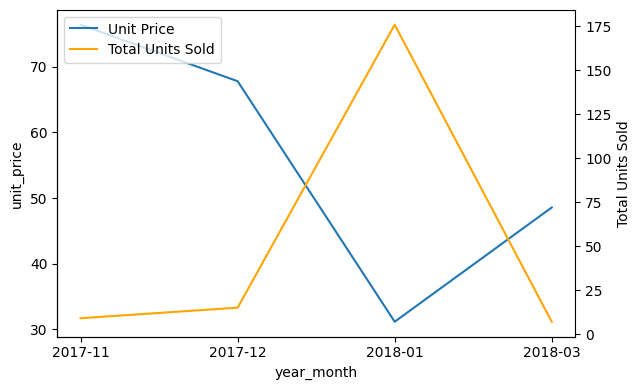

In [ ]:
g = sns.relplot(
    data=ol_pr_ZAG0032,
    x='year_month',
    y='unit_price',
    kind='line',
    height=4,
    aspect=1.5,
    label='Unit Price'  # Add a label for the first line
)
ax = g.axes.flat[0]  # Capture the axes object

# Create a secondary y-axis:
ax2 = plt.twinx()

sns.lineplot(
    data=ol_pr_ZAG0032,
    x='year_month',
    y='total_units_sold',
    ax=ax2,
    color='orange',
    label='Total Units Sold'  # Add a label for the second line
)

ax2.set_ylabel('Total Units Sold')
# Get the lines from both axes
lines, labels = ax.get_legend_handles_labels() #use the captured axes object
lines2, labels2 = ax2.get_legend_handles_labels()
# Combine lines and labels for the legend
all_lines = lines + lines2
all_labels = labels + labels2

# Create the legend using the combined lines and labels
plt.legend(all_lines, all_labels, loc='upper left')

plt.show()

We did same for the second most selled product.

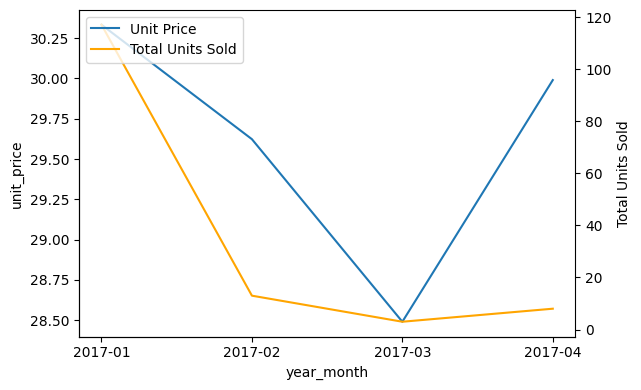

In [ ]:
g = sns.relplot(
    data=ol_pr_JAW0048,
    x='year_month',
    y='unit_price',
    kind='line',
    height=4,
    aspect=1.5,
    label='Unit Price'  # Add a label for the first line
)
ax = g.axes.flat[0]  # Capture the axes object

# Create a secondary y-axis:
ax2 = plt.twinx()

sns.lineplot(
    data=ol_pr_JAW0048,
    x='year_month',
    y='total_units_sold',
    ax=ax2,
    color='orange',
    label='Total Units Sold'  # Add a label for the second line
)

ax2.set_ylabel('Total Units Sold')
# Get the lines from both axes
lines, labels = ax.get_legend_handles_labels() #use the captured axes object
lines2, labels2 = ax2.get_legend_handles_labels()
# Combine lines and labels for the legend
all_lines = lines + lines2
all_labels = labels + labels2

# Create the legend using the combined lines and labels
plt.legend(all_lines, all_labels, loc='upper left')

plt.show()

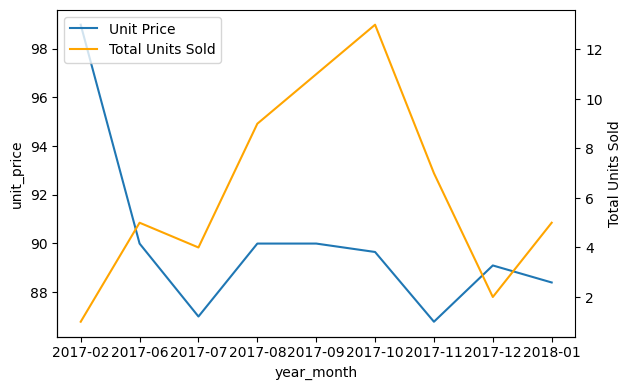

In [ ]:
ol_pr_DLK0057=ol_pr.loc[ol_pr['sku']=='DLK0057',:]
ol_pr_DLK0057 = ol_pr_DLK0057.groupby(['year_month',], as_index=False).agg({'product_quantity':'sum','unit_price':'mean','disc_perc':'mean','disc':'sum'})
ol_pr_DLK0057.rename(columns={'product_quantity': 'total_units_sold'}, inplace=True)
g = sns.relplot(
    data=ol_pr_DLK0057,
    x='year_month',
    y='unit_price',
    kind='line',
    height=4,
    aspect=1.5,
    label='Unit Price'  # Add a label for the first line
)
ax = g.axes.flat[0]  # Capture the axes object

# Create a secondary y-axis:
ax2 = plt.twinx()

sns.lineplot(
    data=ol_pr_DLK0057,
    x='year_month',
    y='total_units_sold',
    ax=ax2,
    color='orange',
    label='Total Units Sold'  # Add a label for the second line
)

ax2.set_ylabel('Total Units Sold')
# Get the lines from both axes
lines, labels = ax.get_legend_handles_labels() #use the captured axes object
lines2, labels2 = ax2.get_legend_handles_labels()
# Combine lines and labels for the legend
all_lines = lines + lines2
all_labels = labels + labels2

# Create the legend using the combined lines and labels
plt.legend(all_lines, all_labels, loc='upper left')

plt.show()

Aggressive discount and product quantity

We have seen outlier in the percentile plot and we saw some product have aggressive discount. We wanted to look into more details in that product.

In [ ]:
# Get the most discount product from th eorderlines product table.
agressive_disc_df=ol_pr.loc[ol_pr.disc_perc>most,:]

In [ ]:
# Change the table into date time DataFrame
agressive_disc_df['date']=pd.to_datetime(agressive_disc_df['date'])

<ipython-input-150-8d3be23cc602>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agressive_disc_df['date']=pd.to_datetime(agressive_disc_df['date'])


In [ ]:
agressive_disc_df['year_month_day']=agressive_disc_df['date'].dt.strftime('%Y-%m-%d')

<ipython-input-151-db1c37b7ef91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agressive_disc_df['year_month_day']=agressive_disc_df['date'].dt.strftime('%Y-%m-%d')


In [ ]:
agressive_disc_df['year_month']=agressive_disc_df['date'].dt.strftime('%Y-%m')

<ipython-input-152-c243191178bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agressive_disc_df['year_month']=agressive_disc_df['date'].dt.strftime('%Y-%m')


In [ ]:
# Look detail into 50 most discounted product
agressive_disc1_df=agressive_disc_df.loc[agressive_disc_df['price']>50,:]


In [ ]:
agressive1_sku=agressive_disc1_df.groupby(['sku', 'name','price' ],as_index=False).agg({'unit_price':'mean','disc_perc':'mean','disc':'sum', 'product_quantity':'sum'}).nlargest(25,'product_quantity')

In [ ]:
agressive1_sku

,sku,name,price,unit_price,disc_perc,disc,product_quantity
109,ZAG0032,Rugged Messenger Zagg iPad Keyboard Folio (201...,99.99,30.293030,69.706970,11500.00,176
89,PAC2477,Pack of 2 units Zagg Coda Wireless Headsets Black,59.98,19.990000,66.670000,5638.59,163
22,JAW0048,Jawbone UP2 Black Rope Activity Monitor,119.99,30.166915,74.862340,8443.37,141
108,ZAG0030,Zagg Folio Case Color Keyboard Folio iPad Air ...,79.99,20.158067,74.800168,7120.00,130
11,BEL0303,"Belkin Suit Line Backpack for MacBook Pro 13 ""...",57.99,23.000101,60.342525,3464.00,107
48,NTE0045,NewerTech NuGuard KX iPhone Case SE / 5s / 5 B...,60.99,16.376719,73.145781,2855.25,67
20,JAW0040,Jawbone UP3 Activity Monitor Black,179.99,49.990000,72.230000,7020.00,62
14,DLK0057,D-Link DCS-825L camera EyeOn Wi-Fi baby monitor,227.00,89.118571,60.743393,7721.36,56
95,PLA0014,Plantronics BackBeat GO 2 Bluetooth Headset Black,89.99,35.990000,60.010000,2646.00,54
35,LOG0084,Logitech Ultrathin Keyboard Cover Keyboard Cov...,89.99,19.796735,78.004490,3439.47,51


In [ ]:
# aggressive discount mean and product quantity sum
agressive_disc=agressive_disc_df.groupby('year_month',as_index=False).agg({'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'})

In [ ]:
agressive_sku=agressive_disc_df.groupby(['sku', 'name','price' ],as_index=False).agg({'disc_perc':'mean','disc':'sum', 'product_quantity':'sum'}).nlargest(15,'disc')

In [ ]:
agressive_sku

,sku,name,price,disc_perc,disc,product_quantity
250,ZAG0032,Rugged Messenger Zagg iPad Keyboard Folio (201...,99.99,69.706970,11500.00,176
64,JAW0048,Jawbone UP2 Black Rope Activity Monitor,119.99,74.862340,8443.37,141
34,DLK0057,D-Link DCS-825L camera EyeOn Wi-Fi baby monitor,227.00,60.743393,7721.36,56
249,ZAG0030,Zagg Folio Case Color Keyboard Folio iPad Air ...,79.99,74.800168,7120.00,130
62,JAW0040,Jawbone UP3 Activity Monitor Black,179.99,72.230000,7020.00,62
14,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,25.00,61.032903,6622.07,737
199,PAC2477,Pack of 2 units Zagg Coda Wireless Headsets Black,59.98,66.670000,5638.59,163
196,PAC2198,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",1199.00,77.020000,5540.46,6
193,PAC2194,"Second hand - Apple iMac 20 ""Core 2 Duo 226GHz...",1199.00,78.265000,3753.64,4
188,PAC2063,"Second hand - Apple iMac 20 ""Core 2 Duo 266GHz...",1499.00,77.380000,3480.00,3


<ipython-input-159-663ea3c95916>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',


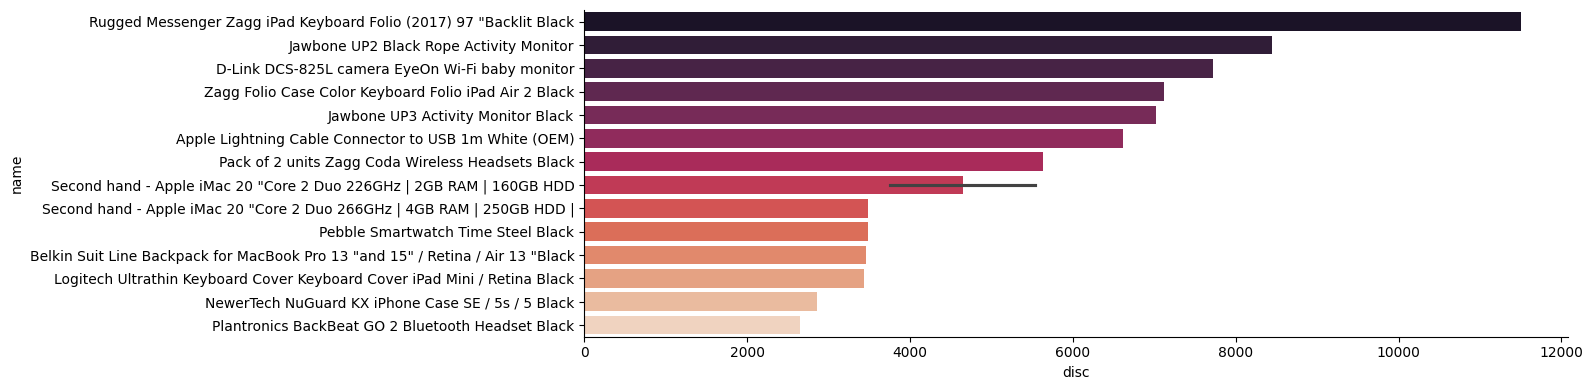

In [ ]:
# Plot the graph to see the pattern
sns.catplot(kind='bar',
            data=agressive_sku,
            x='disc',
            y='name',
            height=4,
            aspect=4,
            palette='rocket')

<ipython-input-160-7d97f95140cf>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',


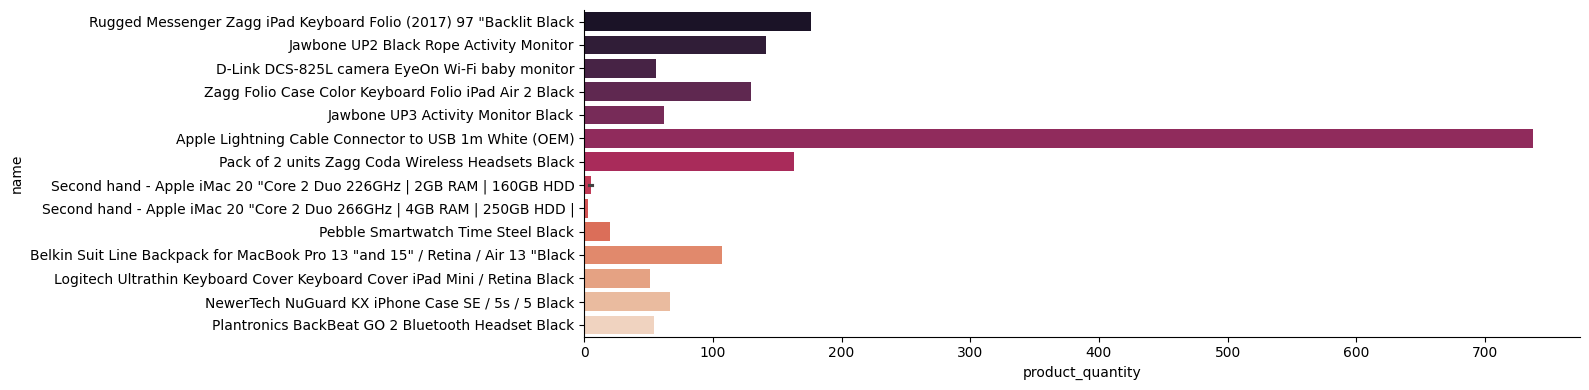

In [ ]:
sns.catplot(kind='bar',
            data=agressive_sku,
            x='product_quantity',
            y='name',
            height=4,
            aspect=4,
            palette='rocket')

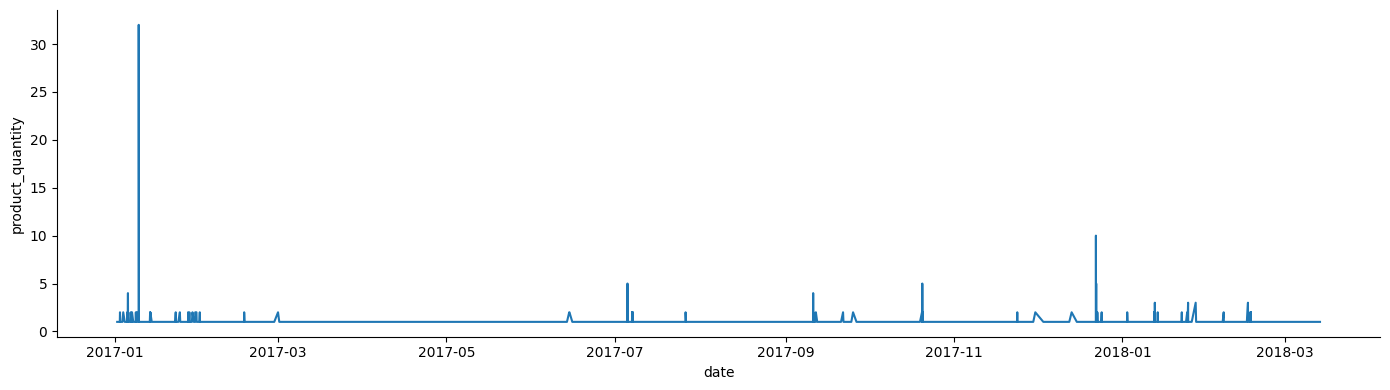

In [ ]:
sns.relplot(
    kind='line',
    data=agressive_disc1_df,
    x='date',
    y='product_quantity',
    height=4,
    aspect=3.5
    )

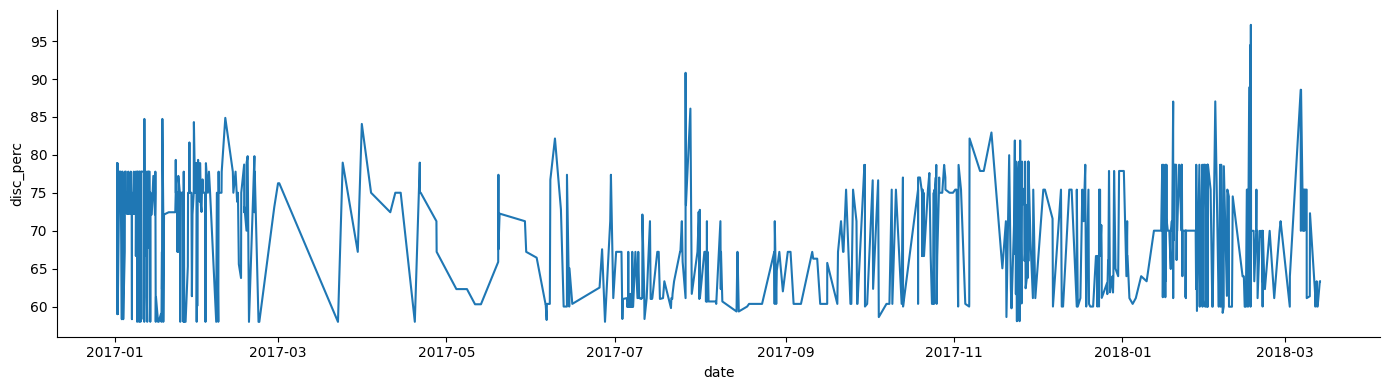

In [ ]:
sns.relplot(
    kind='line',
    data=agressive_disc1_df,
    x='date',
    y='disc_perc',
    height=4,
    aspect=3.5
    )

<ipython-input-163-7cc6f7d1bae2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',


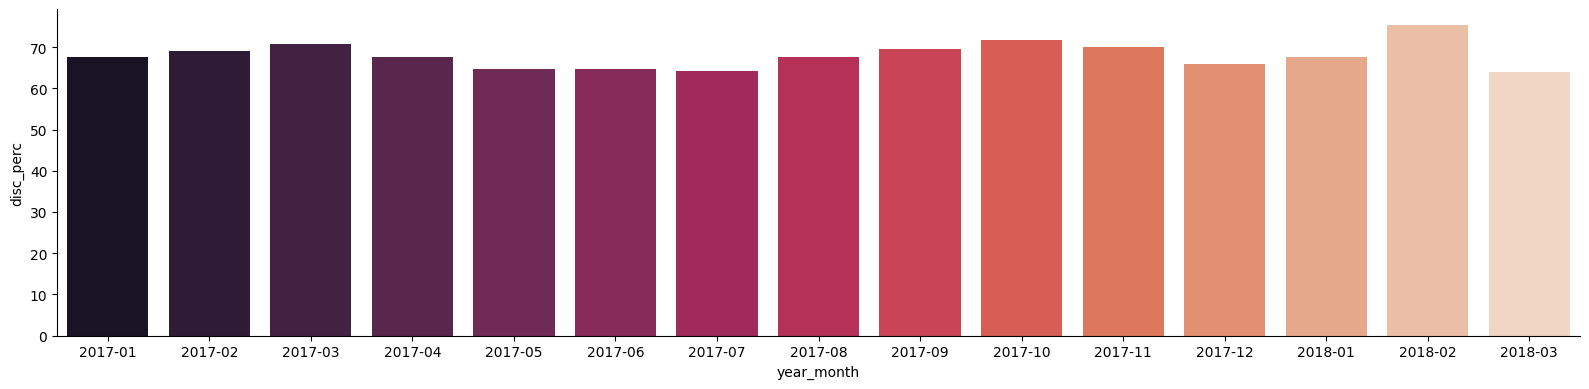

In [ ]:
sns.catplot(kind='bar',
            data=agressive_disc,
            x='year_month',
            y='disc_perc',
            height=4,
            aspect=4,
            palette='rocket')

<ipython-input-164-2361b00d8402>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='bar',


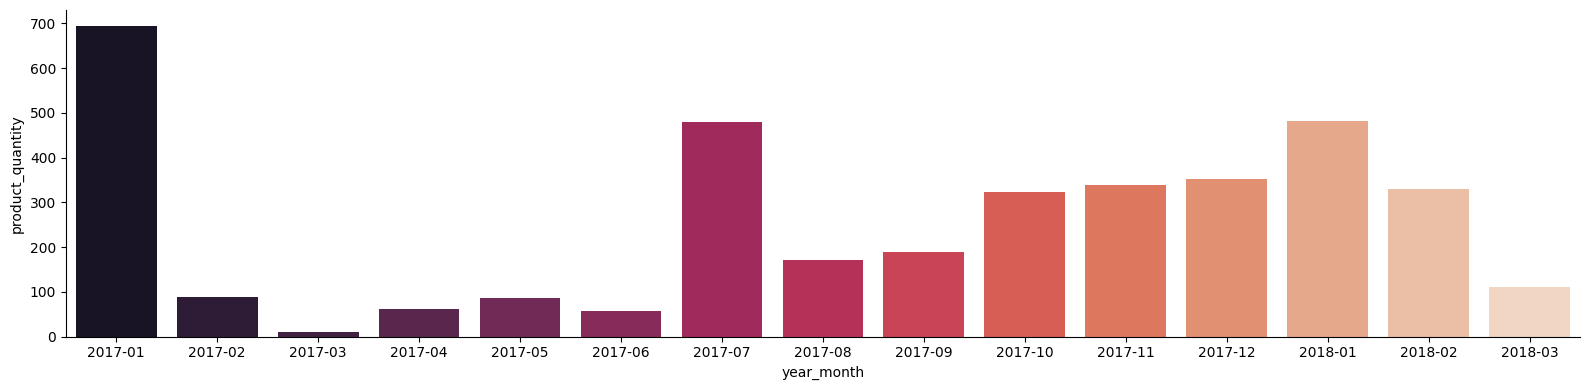

In [ ]:
sns.catplot(kind='bar',
            data=agressive_disc,
            x='year_month',
            y='product_quantity',
            height=4,
            aspect=4,
            palette='rocket'
            )

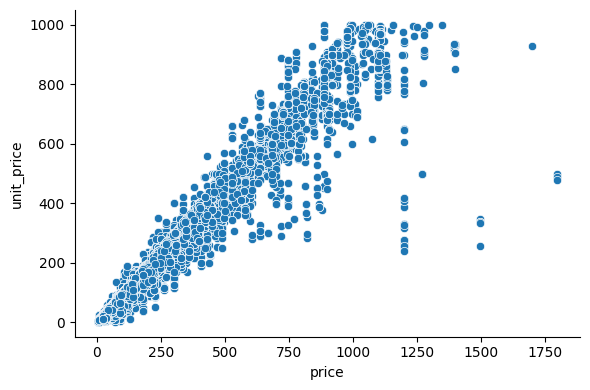

In [ ]:
sns.relplot(data=ol_pr,
            x='price',
            y='unit_price',
            height=4,
            aspect=1.5
            )

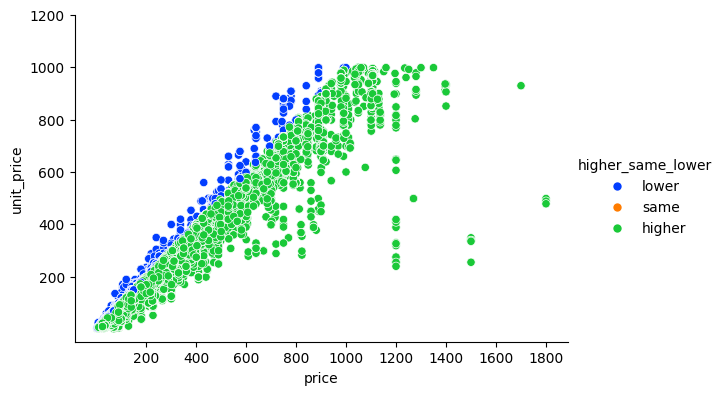

In [ ]:
ol_pr['higher_same_lower'] = pd.cut(ol_pr['disc_perc'],
                                   bins=[-float('inf'), 0, 0.01, float('inf')],
                                   labels=['lower', 'same', 'higher'])


sns.relplot(data=ol_pr,
           x="price",
           y="unit_price",
           hue="higher_same_lower",
           height=4,
           aspect=1.5,
           palette="bright");

plt.xticks([200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800]);
plt.yticks([200, 400, 600, 800, 1000, 1200]);

Overview of the project.

Brands

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)
# brands_cl.csv
url = "https://drive.google.com/file/d/1WUh_PHzgEcUcwAR5kchA6iwJB_M9EXSw/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands_cl = pd.read_csv(path)

In [ ]:
# Make a copy for all the data
orders_qu = orders_cl.copy()
orderlines_qu = orderlines_cl.copy()
products_qu = products_cl.copy()
brands_qu = brands_cl .copy()

I want to check which brands sales the most. First I need to merge the products and orderlines df to get the brands information.

In [ ]:
orders_qu.head(1)

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled


In [ ]:
orderlines_qu.head(2)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45


In [ ]:
products_qu.head(1)

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696


In [ ]:
brands_qu.head(2)

,short,long
0,8MO,8Mobility
1,ACM,Acme


To check the brand name and quantity, price category we should first merged orderlines on sku and product quantity then rename the brands name with sku code then merged brands with orderlines merged. it will give table with short code product quantity and brands name

In [ ]:
orderlines_products = orderlines_qu.merge(products_qu, how="left", on = "sku")[["id_order","sku","name" ]]
orderlines_products.sample(2)

,id_order,sku,name
45803,344219,TUC0274,"Tucano iPad Case Filo Pro 9.7 ""Black"
117792,417205,DRO0020-A,Open - 5C Drobo 5-bay DAS RAID USB-C USB 3.0


In [ ]:
# First we should group the orderlines with sku and product_quantity
grouped_df = orderlines_qu.groupby(orderlines_qu['sku'].str [:3])['product_quantity'].sum().sort_values(ascending=False).reset_index()
grouped_df.rename(columns={'sku':'short'}, inplace = True)
products_brands = grouped_df.merge(brands_qu, how = 'left', on= 'short').sort_values (by = 'product_quantity', ascending= False)
products_brands.head(5)

,short,product_quantity,long
0,APP,55118,Apple
1,OWC,12069,OWC
2,WDT,9821,Western Digital
3,PAC,8004,Pack
4,CRU,7955,Crucial


In [ ]:
# 10 most sales brand by product quantity
orderlines_qu["short"] = orderlines_qu["sku"].str[:3]

In [ ]:
# Merge the orderlines with brands
orderlines_brands_df = orderlines_qu.merge(brands_qu,
                                how="left",
                                left_on="short",
                                right_on="short")
orderlines_brands_df.head(1)

,id,id_order,product_id,product_quantity,sku,unit_price,date,short,long
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,OTT,Otterbox


In [ ]:
#  Now we can find top 10 saling brands
brands_10_most_sold_df = (
                         orderlines_brands_df.groupby("long", as_index=False)
                         ["product_quantity"].sum()
                         .nlargest(10, "product_quantity")
                         )
brands_10_most_sold_df

,long,product_quantity
6,Apple,58210
102,OWC,12069
166,Western Digital,9821
109,Pack,8004
21,Crucial,7955
10,Belkin,7659
165,Wacom,7065
69,LaCie,6787
131,SanDisk,5351
132,Satechi,5096


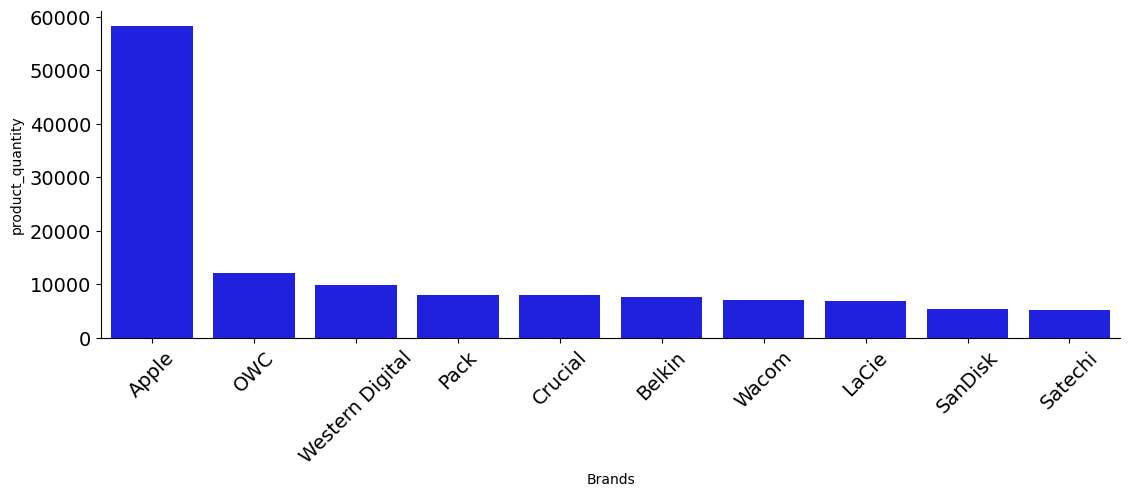

In [ ]:
#Now we can plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=brands_10_most_sold_df,
            x="Brands",
            y="product_quantity",
            height=4,
            aspect=2.8,
            color = "blue");
plt.xticks(rotation =45)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [ ]:
grouped_df = orderlines_qu.groupby(orderlines_qu['sku'].str [:3])['product_quantity'].sum().sort_values(ascending=False).reset_index()
grouped_df.rename(columns={'sku':'short'}, inplace = True)
products_brands = grouped_df.merge(brands_qu, how = 'left', on= 'short').sort_values (by = 'product_quantity', ascending= False)
products_brands.head(10)

,short,product_quantity,long
0,APP,55118,Apple
1,OWC,12069,OWC
2,WDT,9821,Western Digital
3,PAC,8004,Pack
4,CRU,7955,Crucial
5,BEL,7659,Belkin
6,WAC,7065,Wacom
7,LAC,6787,LaCie
8,SAN,5351,SanDisk
9,SAT,5096,Satechi


In [ ]:
total_product_quantity = orderlines_brands_df['product_quantity'].sum()
print("Total Product Quantity:", total_product_quantity)


Total Product Quantity: 245811


In [ ]:
# Calculating the percentage of top 10 sailing product
filtered_top_10_brands = orderlines_brands_df.sort_values(by= 'product_quantity' , ascending=False).head(10)
total_product_quantity = orderlines_brands_df['product_quantity'].sum()
print("Total Product Quantity:", total_product_quantity)

Total Product Quantity: 245811


Product sailing percentage by product quantity brands_10_most_sold_df# New section

In [ ]:
# Now calculate the percentage
numeric_colums = ['product_quantity']
top_10_percentage = (filtered_top_10_brands[numeric_colums].sum() / total_product_quantity) * 100

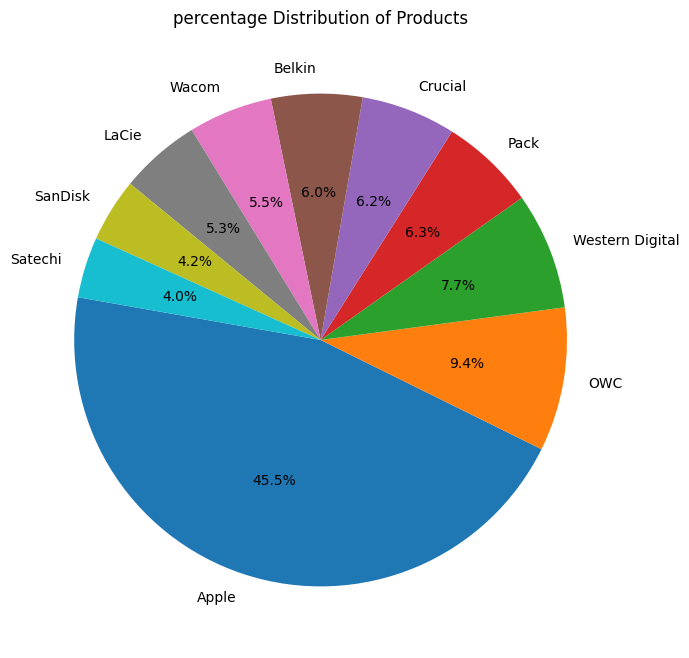

In [ ]:
# We can also use pie chart
plt.figure(figsize=(8,8))
top_10_brands_quantity = brands_10_most_sold_df['product_quantity'].head(10)
plt.pie(top_10_brands_quantity, labels=brands_10_most_sold_df['Brands'], autopct='%1.1f%%', startangle=170)
plt.title("percentage Distribution of Products")
plt.show()

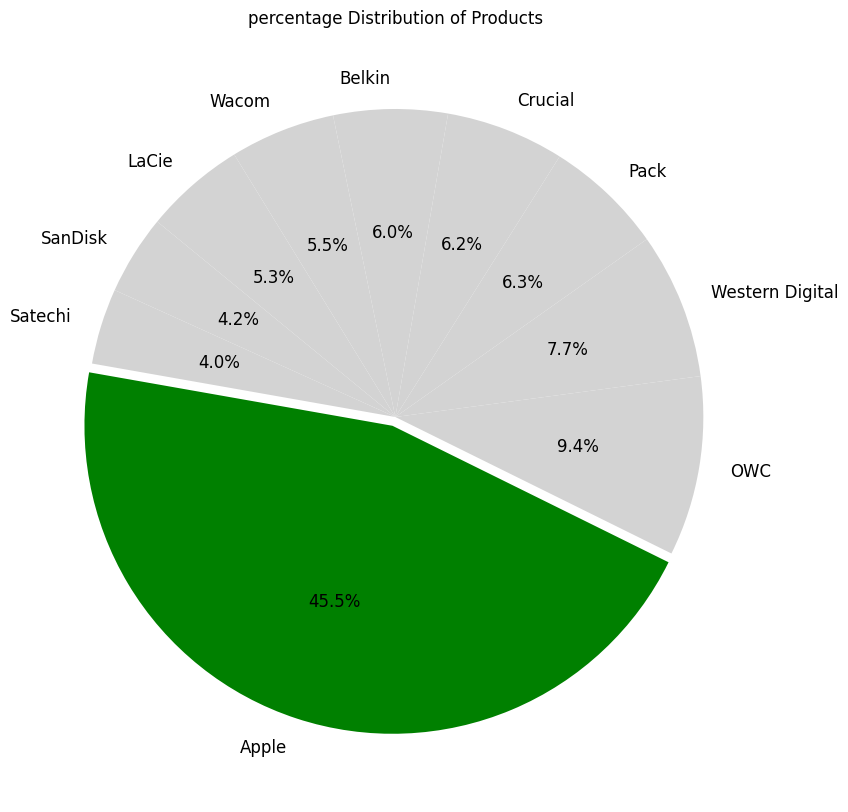

In [ ]:
# Define colors: Light gray for all, highlight Apple in red
colors = ['lightgray' if brand != 'Apple' else 'Green' for brand in brands_10_most_sold_df['Brands']]

# Define explode: Slightly separate Apple brand
explode = [0.03 if brand == 'Apple' else 0 for brand in brands_10_most_sold_df['Brands']]
plt.figure(figsize=(10, 10))
plt.pie(brands_10_most_sold_df['product_quantity'].head(10),
        labels=brands_10_most_sold_df['Brands'].head(10),
        autopct='%1.1f%%',
        startangle=170,
        colors=colors, # Apply the defined colors
        explode=explode,
        textprops={'fontsize': 12}# Apply the defined explode
       )
plt.title("percentage Distribution of Products")
plt.show()

Next we want to calculate total revenue generated by these top 10 brands

In [ ]:
# Step : Group by 'brand' and sum up total revenue
# 1 . We have to merge the prodduct_brands data with ordelines.
orderlines_qu["short"] = orderlines_qu["sku"].str[:3]
products_brands_ol_df = products_brands.merge(orderlines_qu, how = 'left', on= 'short')
products_brands_ol_df.head(5)

,short,product_quantity_x,long,id,id_order,product_id,product_quantity_y,sku,unit_price,date
0,APP,55118,Apple,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
1,APP,55118,Apple,1119140,299559,0,1,APP0700,72.19,2017-01-01 02:32:22
2,APP,55118,Apple,1119143,299559,0,1,APP1214,84.99,2017-01-01 02:36:43
3,APP,55118,Apple,1119153,299562,0,1,APP1045,9.00,2017-01-01 02:39:53
4,APP,55118,Apple,1119162,299567,0,1,APP1647,769.00,2017-01-01 03:16:51


In [ ]:
# Step : Count total revenue for
# Step - Group first group 'brand' and sum up total revenue
brands_revenue = products_brands_ol_df.groupby ("long") ["unit_price"].sum().reset_index()

In [ ]:
# Step 3: Sort by product sale (descending order)
brands_revenue = brands_revenue.sort_values(by="unit_price", ascending=False)

In [ ]:
# Revenue from top 10 brands
# Rename the 'unit_price' column to 'brands_revenue' to match the y parameter
top_10_brands = brands_10_most_sold_df.rename(columns={'brands_revenue': 'total_revenue(billion)', 'long': 'Brands'})

top_10_brands

,Brands,product_quantity
6,Apple,58210
102,OWC,12069
166,Western Digital,9821
109,Pack,8004
21,Crucial,7955
10,Belkin,7659
165,Wacom,7065
69,LaCie,6787
131,SanDisk,5351
132,Satechi,5096


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'OWC'),
  Text(2, 0, 'Western Digital'),
  Text(3, 0, 'Pack'),
  Text(4, 0, 'Crucial'),
  Text(5, 0, 'Belkin'),
  Text(6, 0, 'Wacom'),
  Text(7, 0, 'LaCie'),
  Text(8, 0, 'SanDisk'),
  Text(9, 0, 'Satechi')])

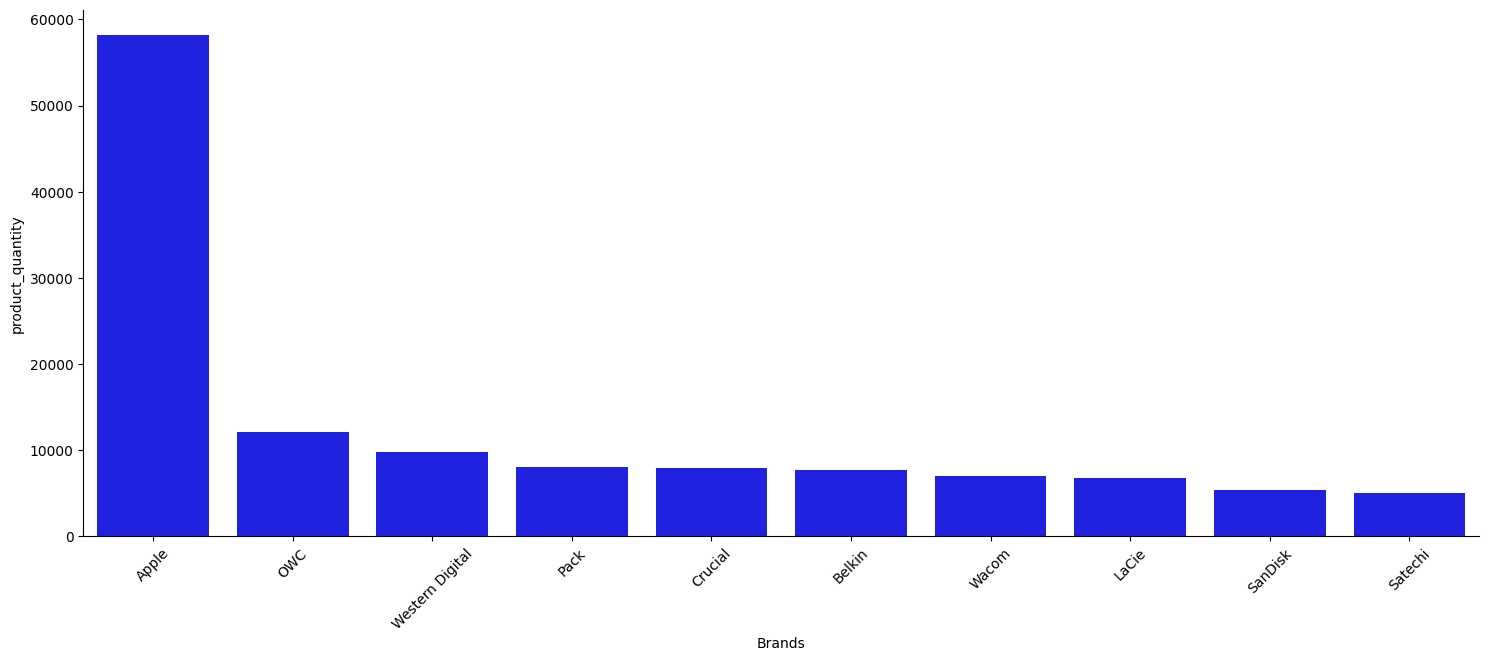

In [ ]:
# Now we can plot the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=top_10_brands,
            x="Brands",
            y="product_quantity",
            height=6,
            aspect=2.5,
            color = "blue");
plt.xticks(rotation =45)

In [ ]:
products_brands_ol_df.head(2)

,short,product_quantity_x,long,id,id_order,product_id,product_quantity_y,sku,unit_price,date
0,APP,55118,Apple,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
1,APP,55118,Apple,1119140,299559,0,1,APP0700,72.19,2017-01-01 02:32:22


In [ ]:
#  Calculate the revenue per product
products_brands_ol_df['revnue_per_product'] = products_brands_ol_df ['product_quantity_y'] * products_brands_ol_df['unit_price']
products_brands_ol_df['revnue_per_product']

,revnue_per_product
0,72.19
1,72.19
2,84.99
3,9.00
4,769.00
...,...
216245,43.88
216246,709.99
216247,404.99
216248,142.11


In [ ]:
#  Total revenue by all the brands
orderlines_qu['revnue_per_product'] =orderlines_qu ['product_quantity'] * orderlines_qu['unit_price']
orderlines_qu['revnue_per_product']

,revnue_per_product
0,18.99
1,399.00
2,474.05
3,68.39
4,23.74
...,...
216245,42.99
216246,141.58
216247,19.98
216248,19.99


In [ ]:
total_revnue = orderlines_qu['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")

Total Revnue: $39122248.11999998


In [ ]:
#  Calculate the Total revenue
total_revnue = products_brands_ol_df['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")

Total Revnue: $39122248.12


Once we have total revenue then we can calculate percentage of top 10 brands

In [ ]:
# Now we can calculate the percentage. first we have to broup the data frame
brands_revnue = products_brands_ol_df.groupby ("long") ["unit_price"].sum().reset_index()

In [ ]:
# Step 3: Sort by product sale (descending order)
brands_revnue = brands_revenue.sort_values(by="unit_price", ascending=False)

In [ ]:
# Revenue from top 10 brands
# Rename the 'unit_price' column to 'brands_revenue' to match the by parameter
top_10_brands = brands_revenue.head(10).copy()
top_10_brands = top_10_brands.rename(columns={'unit_price': 'total_revnue(billion)', 'long': 'Brands'})

top_10_brands.head(2)

,Brands,total_revnue(billion)
6,Apple,16844258.95
109,Pack,2357725.49


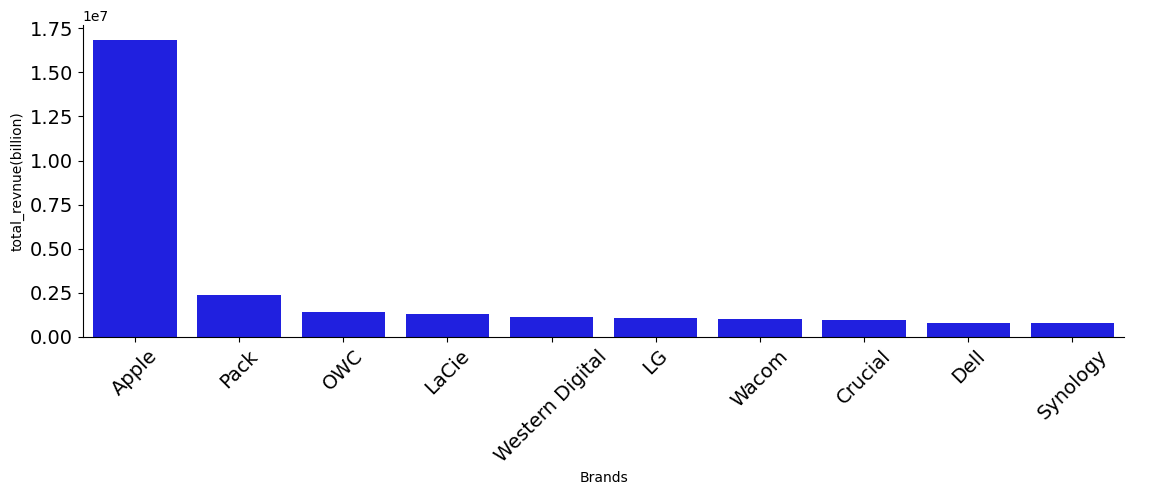

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(kind="bar",
            data=top_10_brands,
            x="Brands",
            y="total_revnue(billion)",
            height=4,
            aspect=2.8,
            color = "blue");
plt.xticks(rotation =45)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [ ]:
# Finally we can calculate the percentage
total_revnue = products_brands_ol_df['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")
top_10_brands['percentage share'] = (top_10_brands['total_revnue(billion)'])/total_revnue*100

Total Revnue: $39122248.12


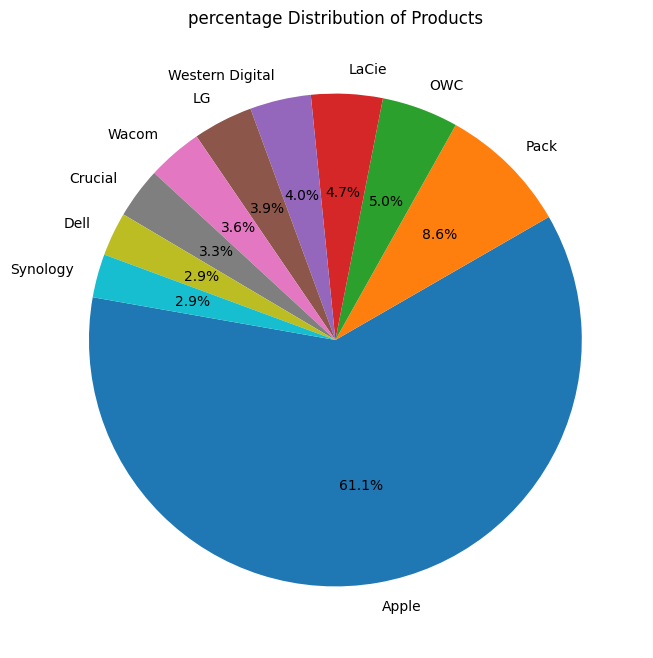

In [ ]:
# We can also use pie chart
plt.figure(figsize=(8,8))
plt.pie(top_10_brands['percentage share'], labels=top_10_brands['Brands'], autopct='%1.1f%%', startangle=170)
plt.title("percentage Distribution of Products")
plt.show()

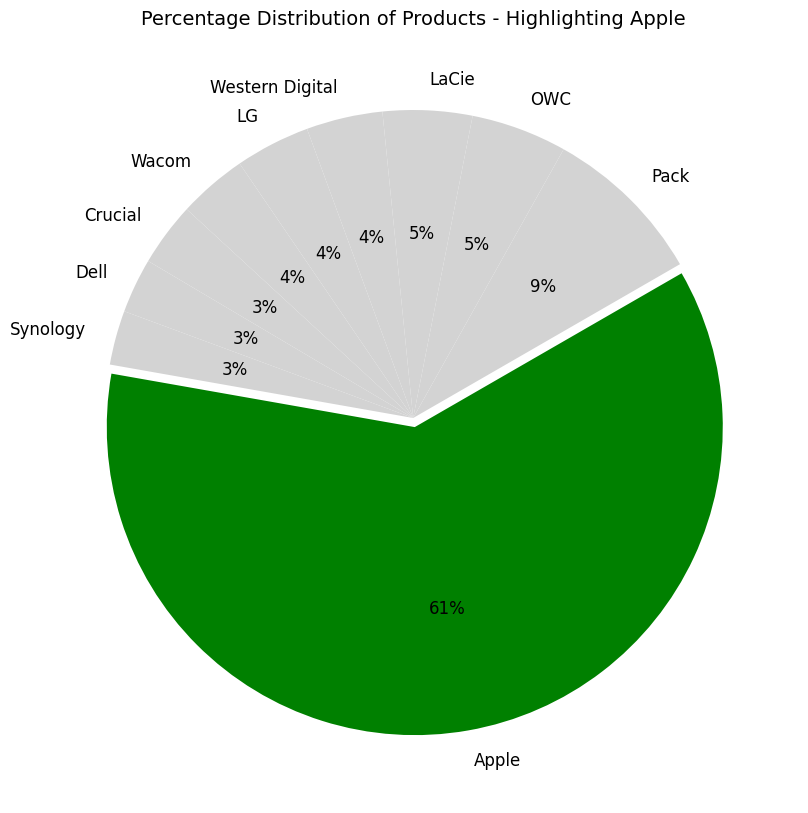

In [ ]:
# I want to see which products from Apple sailing the most
# Define colors: Light gray for all, highlight Apple in red
colors = ['lightgray' if brand != 'Apple' else 'Green' for brand in top_10_brands['Brands']]

# Define explode: Slightly separate Apple brand
explode = [0.03 if brand == 'Apple' else 0 for brand in top_10_brands['Brands']]
plt.figure(figsize=(10, 10))
plt.pie(top_10_brands['total_revnue(billion)'].head(10),
        labels=top_10_brands['Brands'].head(10),
        autopct='%1.0f%%',
        startangle=170,
        colors=colors, # Apply the defined colors
        explode=explode,
        textprops={'fontsize': 12} # Apply the defined explode
       )
plt.title("Percentage Distribution of Products - Highlighting Apple", fontsize=14)
plt.show()

In [ ]:
# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

In [ ]:
#  Total revenue by all the brands
orderlines_qu['revnue_per_product'] =orderlines_qu ['product_quantity'] * orderlines_qu['unit_price']
orderlines_qu['revnue_per_product']

,revnue_per_product
0,18.99
1,399.00
2,474.05
3,68.39
4,23.74
...,...
216245,42.99
216246,141.58
216247,19.98
216248,19.99


In [ ]:
total_revnue = orderlines_qu['revnue_per_product'].sum()
print(f"Total Revnue: ${total_revnue}")

Total Revnue: $39122248.11999998


# New section